In [ ]:
# Dan karanna yanne apita ona libraries tika import karannai

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# dataset eka import karala eke palaweni records 5 balanna meh code eken puluwan

df = pd.read_csv("AmesHousing (1).csv")

df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
# meken anthima records balanna puluwan

df.tail(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [ ]:
# Dan karanna dataset eka sambanda podi info tikak balana ekai

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
# Meh code eke dataset eke columns wala missing percentage eka hoyaganna puluwan, output eken therenawne

missing_percent = df.isnull().sum() / len(df) * 100
missing_df = pd.DataFrame({'Missing %':missing_percent[missing_percent > 0].sort_values(ascending=False)})
missing_df

,Missing %
Pool QC,99.556314
Misc Feature,96.382253
Alley,93.242321
Fence,80.477816
Mas Vnr Type,60.580205
Fireplace Qu,48.532423
Lot Frontage,16.723549
Garage Cond,5.426621
Garage Qual,5.426621
Garage Finish,5.426621


In [ ]:
# Meke wenne api dataset eke columns numerical ui text columns walatai kadana eka

object_columns = df.select_dtypes("object").columns
numerical_columns = df.select_dtypes("number").columns

In [ ]:
# Meh code eken karanne text datatype thiyena column wala null values eh kiyanne
# hiswa thibboth eh his than wala None text eka dana eka

for col in object_columns:
    if col in df.columns and df[col].isnull().any():
        df[col] = df[col].fillna("None")

In [ ]:
# Meken karanne numerical columns wala data missing percentage eka siyata 50 ta wada wadi wunoth
# eh columns tika ayin karana ekai , ehema siyata 50 ta wadi columns thibbe nathnam eke thiyena
# histhan mean eken purawanawa

for col in numerical_columns:
    # Check if the column still exists before proceeding
    if col in df.columns: 
        missing_percent = df[col].isnull().sum() / len(df) * 100
        
        # Only check the threshold
        if missing_percent > 50:
            df.drop(col, axis=1, inplace=True)
            print(f"Dropped column '{col}': {missing_percent:.2f}% missing.")
        else:
            df[col] = df[col].fillna(df[col].mean())

In [ ]:
# Meken balnna puluwan ape dataset eke thiyena histhan ho null values uda code eken purawalada
# kiyna eke

missing_percent = df.isnull().sum() / len(df) * 100
missing_df = pd.DataFrame({'Missing %':missing_percent[missing_percent > 0].sort_values(ascending=False)})
missing_df

,Missing %


In [ ]:
# meken api dataset eke thiyena columns okkoma balanna puluwan
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [ ]:
# meken balanna SalePrice ekath ekka anith columns kochchara correlate ho 
# sahasambandathawayak thiyenawada balanawa
numerical_columns = df.select_dtypes("number").columns
correalations = df[numerical_columns].corrwith(df['SalePrice']).sort_values(ascending=False)
correalations

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647861
Garage Area        0.640385
Total Bsmt SF      0.632105
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.510684
Mas Vnr Area       0.505784
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432794
Lot Frontage       0.340751
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.275894
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182805
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005890
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035815
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

In [ ]:
# Meken wenne sahasambandathawaya 0.5 wada wadi columns thiyela ithuru columns dataset eken ayin karana eka

for col_name,corr_value in correalations.items():
    if (corr_value > 0.5):
        print("Not dropped")
    else:
        df.drop(col_name,axis=1,inplace=True)
        print(f"Drop column: {col_name}")

Not dropped
Not dropped
Not dropped
Not dropped
Not dropped
Not dropped
Not dropped
Not dropped
Not dropped
Not dropped
Not dropped
Not dropped
Drop column: TotRms AbvGrd
Drop column: Fireplaces
Drop column: BsmtFin SF 1
Drop column: Lot Frontage
Drop column: Wood Deck SF
Drop column: Open Porch SF
Drop column: Half Bath
Drop column: Bsmt Full Bath
Drop column: 2nd Flr SF
Drop column: Lot Area
Drop column: Bsmt Unf SF
Drop column: Bedroom AbvGr
Drop column: Screen Porch
Drop column: Pool Area
Drop column: Mo Sold
Drop column: 3Ssn Porch
Drop column: BsmtFin SF 2
Drop column: Misc Val
Drop column: Yr Sold
Drop column: Order
Drop column: Bsmt Half Bath
Drop column: Low Qual Fin SF
Drop column: MS SubClass
Drop column: Overall Cond
Drop column: Kitchen AbvGr
Drop column: Enclosed Porch
Drop column: PID


In [ ]:
# Meken dataset eke rows ganai columns ganai balanna puluwan
df.shape

(2930, 55)

In [168]:
df.head(4)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,None,None,None,WD,Normal,215000
1,RH,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,None,MnPrv,None,WD,Normal,105000
2,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,None,None,Gar2,WD,Normal,172000
3,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,None,None,None,WD,Normal,244000


In [ ]:
# Meken balanne eka eka columns wala thiyena unique values

for key,value in df.items():
    print(f"{key}:{value.unique()}")

MS Zoning:['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']
Street:['Pave' 'Grvl']
Alley:['None' 'Pave' 'Grvl']
Lot Shape:['IR1' 'Reg' 'IR2' 'IR3']
Land Contour:['Lvl' 'HLS' 'Bnk' 'Low']
Utilities:['AllPub' 'NoSewr' 'NoSeWa']
Lot Config:['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']
Land Slope:['Gtl' 'Mod' 'Sev']
Neighborhood:['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
Condition 1:['Norm' 'Feedr' 'PosN' 'RRNe' 'RRAe' 'Artery' 'PosA' 'RRAn' 'RRNn']
Condition 2:['Norm' 'Feedr' 'PosA' 'PosN' 'Artery' 'RRNn' 'RRAe' 'RRAn']
Bldg Type:['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
House Style:['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '1.5Unf' '2.5Fin']
Overall Qual:[ 6  5  7  8  9  4  3  2 10  1]
Year Built:[1960 1961 1958 1968 1997 1998 2001 1992 1995 1999 19

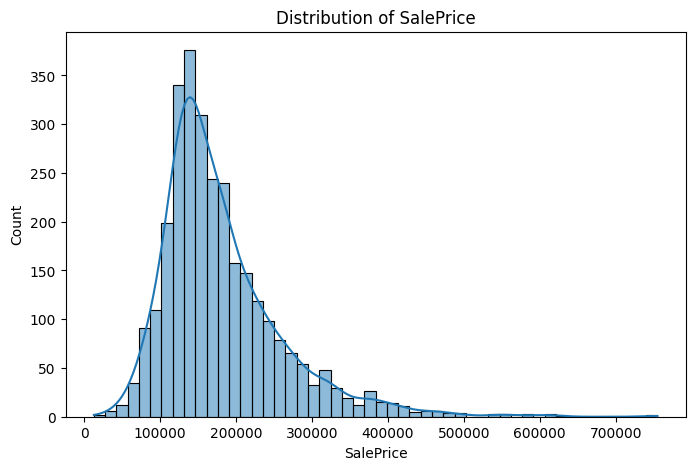

In [ ]:
# Meh code eken apita diagram ekak hadanna puluwan onama column ekaka, saha data pathirima
# hoyanna puluwan

plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True, bins=50) 
plt.title('Distribution of SalePrice')
plt.show()

In [171]:
df.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Total Bsmt SF', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', 'Gr Liv Area',
       'Full Bath', 'Kitchen Qual', 'Functional', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC',
       'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition', 'SalePrice'],
      dtype='object')

In [ ]:
# Skewness ho කුටිකතාව wadi wunoth model eken performance adu wenawa saha skewness eka
# dataset eke outliers innawa kiyala pennawana, skewness eka hadunaganna thamai meka karanne,
# skewness ekea balanne numerical columns wala witharai , text columns wala balnaha

numerical_columns = df.select_dtypes("number").columns

highly_skewed_features = []

for col in numerical_columns:
    skew_value = df[col].skew()
    if skew_value > 1.0:
        highly_skewed_features.append(col)
    print(f"Skewness of {col}: {skew_value:.2f}")

Skewness of Overall Qual: 0.19
Skewness of Year Built: -0.60
Skewness of Year Remod/Add: -0.45
Skewness of Mas Vnr Area: 2.62
Skewness of Total Bsmt SF: 1.16
Skewness of 1st Flr SF: 1.47
Skewness of Gr Liv Area: 1.27
Skewness of Full Bath: 0.17
Skewness of Garage Yr Blt: -0.40
Skewness of Garage Cars: -0.22
Skewness of Garage Area: 0.24
Skewness of SalePrice: 1.74


In [ ]:
# Meh thiynne ara uda code eken hoya gathhu highly skewed columns 

highly_skewed_features

['Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'SalePrice']

In [ ]:
# Meh skew eka harigassanna apita log transformation ekak apply karanna puluwan

for col in highly_skewed_features:
    df[col] = np.log1p(df[col].fillna(0))
    print(f"Log1p transformation applied to {col}.")

Log1p transformation applied to Mas Vnr Area.
Log1p transformation applied to Total Bsmt SF.
Log1p transformation applied to 1st Flr SF.
Log1p transformation applied to Gr Liv Area.
Log1p transformation applied to SalePrice.


In [ ]:
# Anith tika chatgpt dala balanna :)

def detect_outliers_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_df = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers_df

columns_to_check = df.select_dtypes('number').columns

outlier_cols = []

for column in columns_to_check:
    outliers = detect_outliers_iqr(df, column)
    
    #plt.figure(figsize=(10, 5))
    #sns.boxplot(x=df[column])
    #plt.title(f'Boxplot of {column} with Outliers')
    #plt.show()
    print(f'Outliers in {column}:')
    if outliers.empty:
        print('No outliers found.\n')
    else:
        print(f"{column} has outliers")
        outlier_cols.append(column)
        print('\n')

Outliers in Overall Qual:
Overall Qual has outliers


Outliers in Year Built:
Year Built has outliers


Outliers in Year Remod/Add:
No outliers found.

Outliers in Mas Vnr Area:
No outliers found.

Outliers in Total Bsmt SF:
Total Bsmt SF has outliers


Outliers in 1st Flr SF:
1st Flr SF has outliers


Outliers in Gr Liv Area:
Gr Liv Area has outliers


Outliers in Full Bath:
Full Bath has outliers


Outliers in Garage Yr Blt:
Garage Yr Blt has outliers


Outliers in Garage Cars:
Garage Cars has outliers


Outliers in Garage Area:
Garage Area has outliers


Outliers in SalePrice:
SalePrice has outliers




In [176]:
outlier_cols

['Overall Qual',
 'Year Built',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Full Bath',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'SalePrice']

In [177]:
df[numerical_columns].describe()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,6.094881,1971.356314,1984.266553,2.109677,6.731772,7.004266,7.260868,1.566553,1978.132443,1.766815,472.819734,12.020975
std,1.411026,30.245361,20.860286,2.622685,1.180429,0.322379,0.324447,0.552941,24.825842,0.760437,215.009836,0.407584
min,1.000000,1872.000000,1950.000000,0.000000,0.000000,5.814131,5.814131,0.000000,1895.000000,0.000000,0.000000,9.456419
25%,5.000000,1954.000000,1965.000000,0.000000,6.677083,6.776792,7.027315,1.000000,1962.000000,1.000000,320.000000,11.771444
50%,6.000000,1973.000000,1993.000000,0.000000,6.898715,6.989335,7.274480,2.000000,1978.132443,2.000000,480.000000,11.982935
75%,7.000000,2001.000000,2004.000000,5.098337,7.172041,7.233455,7.463793,2.000000,2001.000000,2.000000,576.000000,12.271397
max,10.000000,2010.000000,2010.000000,7.378384,8.717846,8.536211,8.638171,4.000000,2207.000000,5.000000,1488.000000,13.534474


In [178]:
def cap_outliers_iqr(df, column):
    # 1. Calculate the IQR bounds
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 2. Apply Capping using .clip()
    # .clip() replaces values outside the [lower_bound, upper_bound] range
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    print(f"Capped outliers in {column}. New min: {df[column].min():.2f}, New max: {df[column].max():.2f}")
    
    return df

In [179]:
for col in numerical_columns:
    df_new = cap_outliers_iqr(df,col)

Capped outliers in Overall Qual. New min: 2.00, New max: 10.00
Capped outliers in Year Built. New min: 1883.50, New max: 2010.00
Capped outliers in Year Remod/Add. New min: 1950.00, New max: 2010.00
Capped outliers in Mas Vnr Area. New min: 0.00, New max: 7.38
Capped outliers in Total Bsmt SF. New min: 5.93, New max: 7.91
Capped outliers in 1st Flr SF. New min: 6.09, New max: 7.92
Capped outliers in Gr Liv Area. New min: 6.37, New max: 8.12
Capped outliers in Full Bath. New min: 0.00, New max: 3.50
Capped outliers in Garage Yr Blt. New min: 1903.50, New max: 2059.50
Capped outliers in Garage Cars. New min: 0.00, New max: 3.50
Capped outliers in Garage Area. New min: 0.00, New max: 960.00
Capped outliers in SalePrice. New min: 11.02, New max: 13.02


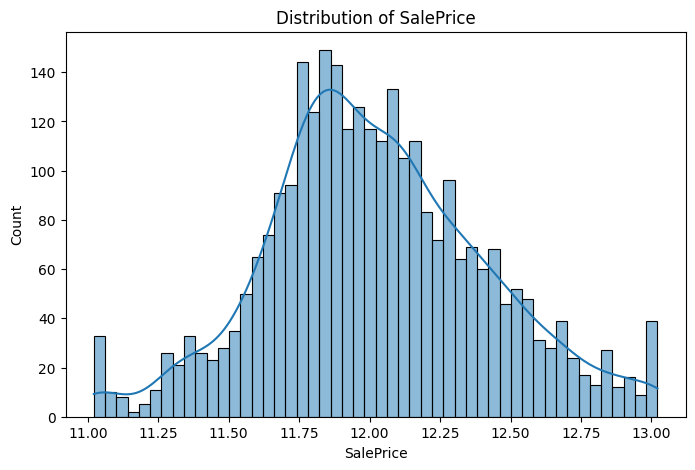

In [180]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True, bins=50) 
plt.title('Distribution of SalePrice')
plt.show()

In [181]:
for col in object_columns:
    print(f"{col} : {df[col].nunique()}")

MS Zoning : 7
Street : 2
Alley : 3
Lot Shape : 4
Land Contour : 4
Utilities : 3
Lot Config : 5
Land Slope : 3
Neighborhood : 28
Condition 1 : 9
Condition 2 : 8
Bldg Type : 5
House Style : 8
Roof Style : 6
Roof Matl : 8
Exterior 1st : 16
Exterior 2nd : 17
Mas Vnr Type : 5
Exter Qual : 4
Exter Cond : 5
Foundation : 6
Bsmt Qual : 6
Bsmt Cond : 6
Bsmt Exposure : 5
BsmtFin Type 1 : 7
BsmtFin Type 2 : 7
Heating : 6
Heating QC : 5
Central Air : 2
Electrical : 6
Kitchen Qual : 5
Functional : 8
Fireplace Qu : 6
Garage Type : 7
Garage Finish : 4
Garage Qual : 6
Garage Cond : 6
Paved Drive : 3
Pool QC : 5
Fence : 5
Misc Feature : 6
Sale Type : 10
Sale Condition : 6


In [186]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [183]:
df['Exterior 1st'].unique()

array(['BrkFace', 'VinylSd', 'Wd Sdng', 'CemntBd', 'HdBoard', 'Plywood',
       'MetalSd', 'AsbShng', 'WdShing', 'Stucco', 'AsphShn', 'BrkComm',
       'CBlock', 'PreCast', 'Stone', 'ImStucc'], dtype=object)

In [184]:
df['Exterior 2nd'].unique()

array(['Plywood', 'VinylSd', 'Wd Sdng', 'BrkFace', 'CmentBd', 'HdBoard',
       'Wd Shng', 'MetalSd', 'ImStucc', 'Brk Cmn', 'AsbShng', 'Stucco',
       'AsphShn', 'CBlock', 'Stone', 'PreCast', 'Other'], dtype=object)

In [185]:
df['Sale Type'].unique()

array(['WD ', 'New', 'COD', 'ConLI', 'Con', 'ConLD', 'Oth', 'ConLw',
       'CWD', 'VWD'], dtype=object)

In [187]:
# Import the specific encoder
import category_encoders as ce

# Assuming 'df' is your current DataFrame

# 1. Select the column(s) you want to binary encode
# Example: Using the 'Neighborhood' column (28 categories)
columns_to_encode = ['Neighborhood','Exterior 1st','Exterior 2nd','Sale Type']

# 2. Create the Binary Encoder object
# The encoder automatically calculates the log2 of the cardinality
encoder = ce.BinaryEncoder(cols=columns_to_encode)

# 3. Fit and transform the data
# The encoder will replace the original column with the new binary columns
df_encoded = encoder.fit_transform(df)

# Output for comparison (28 categories requires 5 new columns: log2(28) ≈ 4.8)
print(f"Original columns: {df.shape[1]}")
print(f"New encoded shape: {df_encoded.shape[1]}")

# You would typically see new columns named 'Neighborhood_0', 'Neighborhood_1', etc.
print("\nFirst 5 rows of Binary Encoded Columns:")
print(df_encoded.filter(regex='Neighborhood_', axis=1).head())

Original columns: 55
New encoded shape: 70

First 5 rows of Binary Encoded Columns:
   Neighborhood_0  Neighborhood_1  Neighborhood_2  Neighborhood_3  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               1   

   Neighborhood_4  
0               1  
1               1  
2               1  
3               1  
4               0  


In [188]:


# 1. Define the columns that were ALREADY processed with Binary Encoding
encoded_cols = ['Neighborhood', 'Exterior 1st', 'Exterior 2nd', 'Sale Type']

# 2. Identify ALL remaining categorical columns
# First get all current categorical columns from the modified df
all_current_categorical = df.select_dtypes(include=['object']).columns

# 3. Create a list of columns that still NEED One-Hot Encoding
# This list contains ALL categorical columns MINUS the ones you binary encoded.
cols_to_one_hot = all_current_categorical.difference(encoded_cols).tolist()

print(f"Columns remaining for One-Hot Encoding: {cols_to_one_hot}")

# 4. Apply One-Hot Encoding to the remaining columns
# The 'df' is updated in place with the new dummy variables
df_encoded_2 = pd.get_dummies(
    df_encoded, 
    columns=cols_to_one_hot, 
    drop_first=True
) 

print("\nOne-Hot Encoding complete for all remaining categorical features.")
print(f"Final DataFrame shape: {df_encoded_2.shape}")

Columns remaining for One-Hot Encoding: ['Alley', 'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Qual', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air', 'Condition 1', 'Condition 2', 'Electrical', 'Exter Cond', 'Exter Qual', 'Fence', 'Fireplace Qu', 'Foundation', 'Functional', 'Garage Cond', 'Garage Finish', 'Garage Qual', 'Garage Type', 'Heating', 'Heating QC', 'House Style', 'Kitchen Qual', 'Land Contour', 'Land Slope', 'Lot Config', 'Lot Shape', 'MS Zoning', 'Mas Vnr Type', 'Misc Feature', 'Paved Drive', 'Pool QC', 'Roof Matl', 'Roof Style', 'Sale Condition', 'Street', 'Utilities']

One-Hot Encoding complete for all remaining categorical features.
Final DataFrame shape: (2930, 204)


In [189]:
df_encoded_2

,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Overall Qual,Year Built,Year Remod/Add,Exterior 1st_0,Exterior 1st_1,...,Roof Style_Mansard,Roof Style_Shed,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,Street_Pave,Utilities_NoSeWa,Utilities_NoSewr
0,0,0,0,0,1,6,1960.0,1960,0,0,...,False,False,False,False,False,True,False,True,False,False
1,0,0,0,0,1,5,1961.0,1961,0,0,...,False,False,False,False,False,True,False,True,False,False
2,0,0,0,0,1,6,1958.0,1958,0,0,...,False,False,False,False,False,True,False,True,False,False
3,0,0,0,0,1,7,1968.0,1968,0,0,...,False,False,False,False,False,True,False,True,False,False
4,0,0,0,1,0,5,1997.0,1998,0,0,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1,0,1,1,1,6,1984.0,1984,0,0,...,False,False,False,False,False,True,False,True,False,False
2926,1,0,1,1,1,5,1983.0,1983,0,0,...,False,False,False,False,False,True,False,True,False,False
2927,1,0,1,1,1,5,1992.0,1992,0,0,...,False,False,False,False,False,True,False,True,False,False
2928,1,0,1,1,1,5,1974.0,1975,0,0,...,False,False,False,False,False,True,False,True,False,False


In [190]:
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame 'df' is now fully cleaned, transformed, and encoded.
# Identify all numerical features (including those that were log-transformed)
numerical_cols_to_scale = df.select_dtypes(include=['number']).columns.tolist()

# IMPORTANT: Remove the target variable (SalePrice) from the list!
# The target variable should NOT be scaled.
if 'SalePrice' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('SalePrice')

# 1. Initialize the Scaler
scaler = StandardScaler()

# 2. Fit and transform the columns
# We use .values to work directly with the underlying numpy array, then update the DataFrame
df_encoded_2[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print("Standard Scaling applied to all numerical predictor features.")


Standard Scaling applied to all numerical predictor features.


In [191]:
df_encoded_2

,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Overall Qual,Year Built,Year Remod/Add,Exterior 1st_0,Exterior 1st_1,...,Roof Style_Mansard,Roof Style_Shed,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,Street_Pave,Utilities_NoSeWa,Utilities_NoSewr
0,0,0,0,0,1,-0.068437,-0.376586,-1.163488,0,0,...,False,False,False,False,False,True,False,True,False,False
1,0,0,0,0,1,-0.779508,-0.343468,-1.115542,0,0,...,False,False,False,False,False,True,False,True,False,False
2,0,0,0,0,1,-0.068437,-0.442821,-1.259380,0,0,...,False,False,False,False,False,True,False,True,False,False
3,0,0,0,0,1,0.642633,-0.111645,-0.779919,0,0,...,False,False,False,False,False,True,False,True,False,False
4,0,0,0,1,0,-0.779508,0.848766,0.658466,0,0,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1,0,1,1,1,-0.068437,0.418237,-0.012780,0,0,...,False,False,False,False,False,True,False,True,False,False
2926,1,0,1,1,1,-0.779508,0.385120,-0.060726,0,0,...,False,False,False,False,False,True,False,True,False,False
2927,1,0,1,1,1,-0.779508,0.683178,0.370789,0,0,...,False,False,False,False,False,True,False,True,False,False
2928,1,0,1,1,1,-0.779508,0.087061,-0.444296,0,0,...,False,False,False,False,False,True,False,True,False,False


In [192]:
df_encoded_2.isnull().sum() 

Neighborhood_0            0
Neighborhood_1            0
Neighborhood_2            0
Neighborhood_3            0
Neighborhood_4            0
                         ..
Sale Condition_Normal     0
Sale Condition_Partial    0
Street_Pave               0
Utilities_NoSeWa          0
Utilities_NoSewr          0
Length: 204, dtype: int64

In [196]:
from sklearn.model_selection import train_test_split

X = df_encoded_2.drop('SalePrice',axis=1)
y = df_encoded_2['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [197]:
missing_percen = X.isnull().sum() / len(X) * 100
missing_df = pd.DataFrame({'Missing %':missing_percen[missing_percen > 0].sort_values(ascending=False)})
missing_df

,Missing %


In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [199]:
y_pred = model.predict(X_test)
error = mean_squared_error(y_test,y_pred)
error

0.01788188451816055